In [1]:
import pandas as pd
import statistics as stat

In [2]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95, normalize=False):
    a = 1.0 * np.array(data)
    n = len(a)

    # normalization comes here?
    
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h


# returns average m and confidence interval h ( +- h )
def readAverage(lang = None, app = None, nThreads = 0, normalize=False):
    my_file = open(f"./output/{lang}_{app}_{nThreads}threads.out", "r")
    content = my_file.read()
    content_list = content.split("\n")
    my_file.close()
    content_list = list(map(float, content_list[:30]))
    #return stat.mean(content_list)
    return mean_confidence_interval(content_list)
    
#av, er = readAverage(lang="python_threadpool", app='pi', nThreads = 0)
#print(av)
#print(er)

In [3]:
a = [2,2,3,3,3,3,4,3]

# normalizing taking the first value as 1

# normalize data before finding mean and stuff
# taking a[0] as 1
norm = a[0]
for idx,val in enumerate(a):
    a[idx] = val/norm

print(a)

[1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 2.0, 1.5]


In [4]:
languages = [    
#    'python_processpool',
#    'python_threadpool',
#    'go',
    'rust',
    'kotlin'
]

applications = [
    #'pi',
    'matrix',   
]

nthreads = [0,1,2,3,6,10,100]

normalize = False
speedup = False

In [5]:
averages = {} # starts as an empty dict
errors = {} # decoupling these two looks so disgusting... but time is of the essence now!

for l in languages:
    #filenames = []
    averages[l] = []
    errors[l] = []
    #for a in applications:
    for a in applications:
        for nth in nthreads:
            #filenames.append(f'./output/{l}_{a}_{nth}.out')
            avg, err = readAverage(lang=l, app=a, nThreads=nth)

            averages[l].append(avg)
            errors[l].append(err)

    if(normalize == True):
        #normalize averages within every language
        # taking averages[0] (of zero threads) as 1
        norm = averages[l][0]
        for idx,val in enumerate(averages[l]):
            averages[l][idx] = val/norm
            errors[l][idx] = errors[l][idx] / norm

            if(speedup == True):
                averages[l][idx] = 1/ (val/norm)

print('\n')
for l in languages:
    print(l, averages[l])



rust [3.030713473566666, 3.252363462733334, 1.7060969752666664, 1.1510382454666663, 0.9483797150999999, 1.0279233445333336, 0.960125002]
kotlin [1.9556333333333336, 1.9771, 1.0233999999999999, 0.7225999999999999, 0.6956666666666667, 1.0696, 1.0614333333333335]


In [6]:
dfs = {}

for l in languages:
    dfs[l] = {'nThreads': nthreads, 'avg': averages[l], 'err': errors[l]}

for l in languages:
    df = pd.DataFrame(dfs[l])
    df.style.set_caption(f"{l} - pi")
    display(df)

,nThreads,avg,err
0,0,3.030713,0.023870
1,1,3.252363,0.061047
2,2,1.706097,0.008977
3,3,1.151038,0.008353
4,6,0.948380,0.012661
5,10,1.027923,0.010450
6,100,0.960125,0.003574


,nThreads,avg,err
0,0,1.955633,0.018363
1,1,1.977100,0.012923
2,2,1.023400,0.008993
3,3,0.722600,0.009808
4,6,0.695667,0.013953
5,10,1.069600,0.006001
6,100,1.061433,0.010774


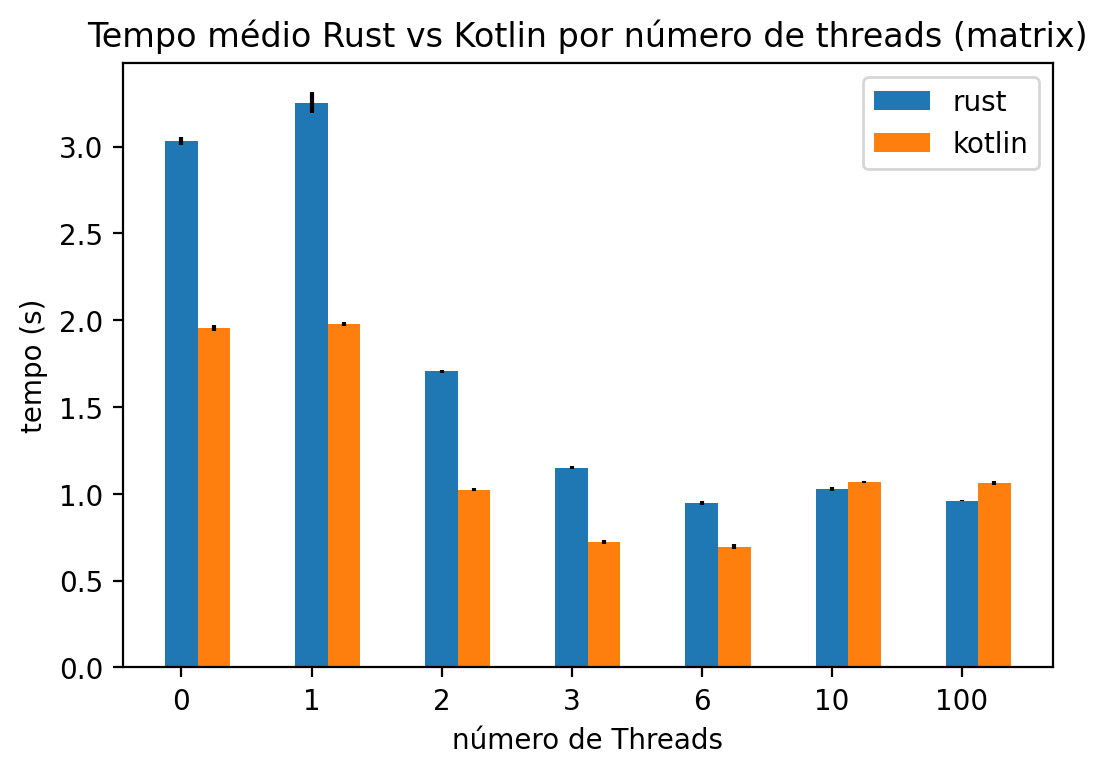

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

X = nthreads

 
X_axis = np.arange(len(X))

width = 1.0/(len(languages)+2)

count = 0
for l in languages:
    if(normalize==False):
        plt.bar(X_axis+width*count, averages[l], yerr=errors[l], width=width, label = l)
    else: # if normalized, omit bars
        plt.bar(X_axis+width*count, averages[l], width=width, label = l)
    count += 1

plt.xticks(X_axis, X)
plt.xlabel("número de Threads")
if(normalize == True):
    plt.ylabel("speedup")
    plt.title(f"speedup médio Rust vs Kotlin por número de threads ({applications[0]})") #applications[0] é NOJENTO
else:
    plt.ylabel("tempo (s)")
    plt.title(f"Tempo médio por linguagem por número de threads ({applications[0]})") #applications[0] é NOJENTO
plt.legend()
plt.show()